In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
data = pd.read_csv('IMDb-Movies-India.csv', encoding='ISO-8859-1')

In [8]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [10]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [12]:
data.describe(include = "all")

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [14]:
data.shape

(15509, 10)

In [16]:
data.isnull().values.any()

True

In [18]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

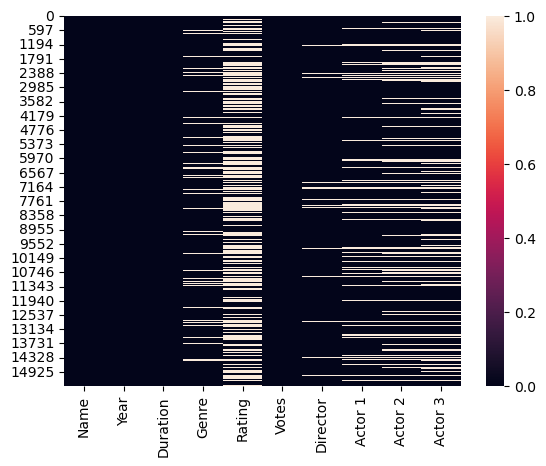

In [42]:
sns.heatmap(data.isnull())

In [48]:
per_missing = data.isnull().sum() * 100 / len(data)
per_missing

Name         0.000000
Year         0.000000
Duration     0.000000
Genre       12.102650
Rating      48.939326
Votes        0.000000
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

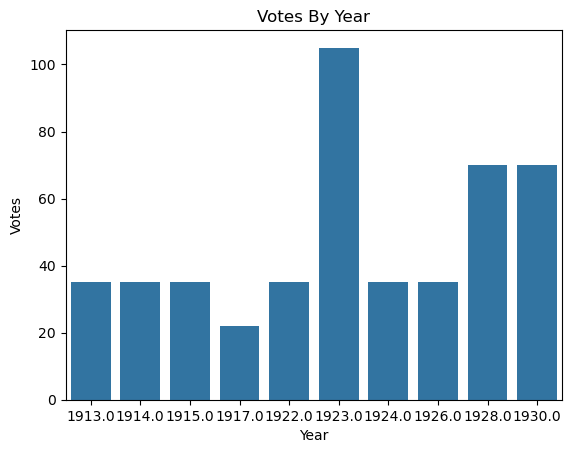

In [40]:
grouped_data = data.groupby('Year')['Votes'].sum().reset_index()
grouped_data = grouped_data.sort_values('Year')
top_10_data = grouped_data.head(10)

sns.barplot(x='Year', y='Votes', data=top_10_data)
plt.title("Votes By Year")
plt.show()

In [20]:
data['Year'] = data['Year'].astype(str).str.extract(r'(\d{4})').astype(float)
data['Duration'] = data['Duration'].astype(str).str.extract(r'(\d+)').astype(float)
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')  

numeric_cols = ['Year', 'Duration', 'Votes']
data[numeric_cols] = data[numeric_cols].apply(lambda col: col.fillna(col.median()))

features = ['Year', 'Duration', 'Votes']
X = data[features].copy()
le = LabelEncoder()
X['Genre'] = le.fit_transform(data['Genre'].astype(str))

y = data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Feature columns:", X.columns)
print("First few rows of features:")
print(X.head())

Features shape: (15509, 4)
Target shape: (15509,)
Feature columns: Index(['Year', 'Duration', 'Votes', 'Genre'], dtype='object')
First few rows of features:
     Year  Duration  Votes  Genre
0  1991.0     131.0   35.0    299
1  2019.0     109.0    8.0    299
2  2021.0      90.0   35.0    351
3  2019.0     110.0   35.0    228
4  2010.0     105.0   35.0    299


In [22]:
print("Number of NaN values in training target:", y_train.isna().sum())
print("Number of NaN values in test target:", y_test.isna().sum())

X_train_clean = X_train[~y_train.isna()]
y_train_clean = y_train[~y_train.isna()]

X_test_clean = X_test[~y_test.isna()]
y_test_clean = y_test[~y_test.isna()]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_clean, y_train_clean)

y_pred = model.predict(X_test_clean)

mse = mean_squared_error(y_test_clean, y_pred)
r2 = r2_score(y_test_clean, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Number of NaN values in training target: 6047
Number of NaN values in test target: 1543
Mean Squared Error: 1.4678123620083514
R^2 Score: 0.23312322045636213


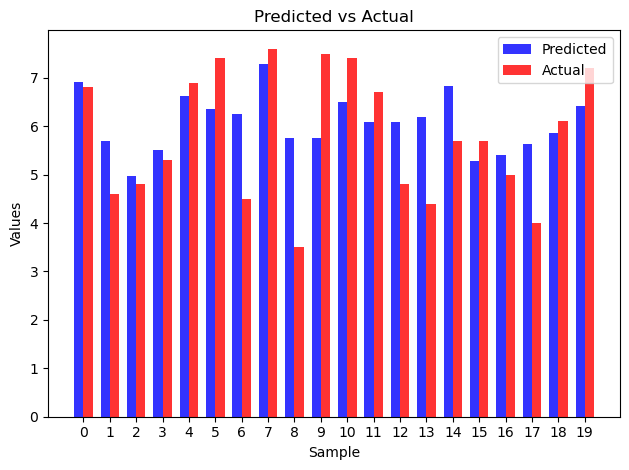

In [50]:
sample_size = 20  
y_test_subset = y_test_clean[:sample_size]
y_pred_subset = y_pred[:sample_size]

assert len(y_test_subset) == len(y_pred_subset), "Length of y_test_subset and y_pred_subset must match"

fig, ax = plt.subplots()
index = np.arange(len(y_test_subset))
bar_width = 0.35
opacity = 0.8

predicted_bars = plt.bar(index, y_pred_subset, bar_width, alpha=opacity, color='b', label='Predicted')
actual_bars = plt.bar(index + bar_width, y_test_subset, bar_width, alpha=opacity, color='r', label='Actual')

plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual')
plt.xticks(index + bar_width / 2, index)
plt.legend()

plt.tight_layout()
plt.show()